In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import math
from pprint import pprint
import seaborn as sns
import astropy.units as u
from astropy.coordinates import SkyCoord
from scipy.stats import kstest, ks_2samp
%matplotlib inline

In [11]:
"""decals的测试集结果"""
in_pred = pd.read_table("/data/renhaoye/MorCG/in_decals_prob.txt", sep=" ")
"""sdss的预测结果"""
out_pred = pd.read_table("/data/renhaoye/MorCG/out_decals_prob.txt", sep=" ")

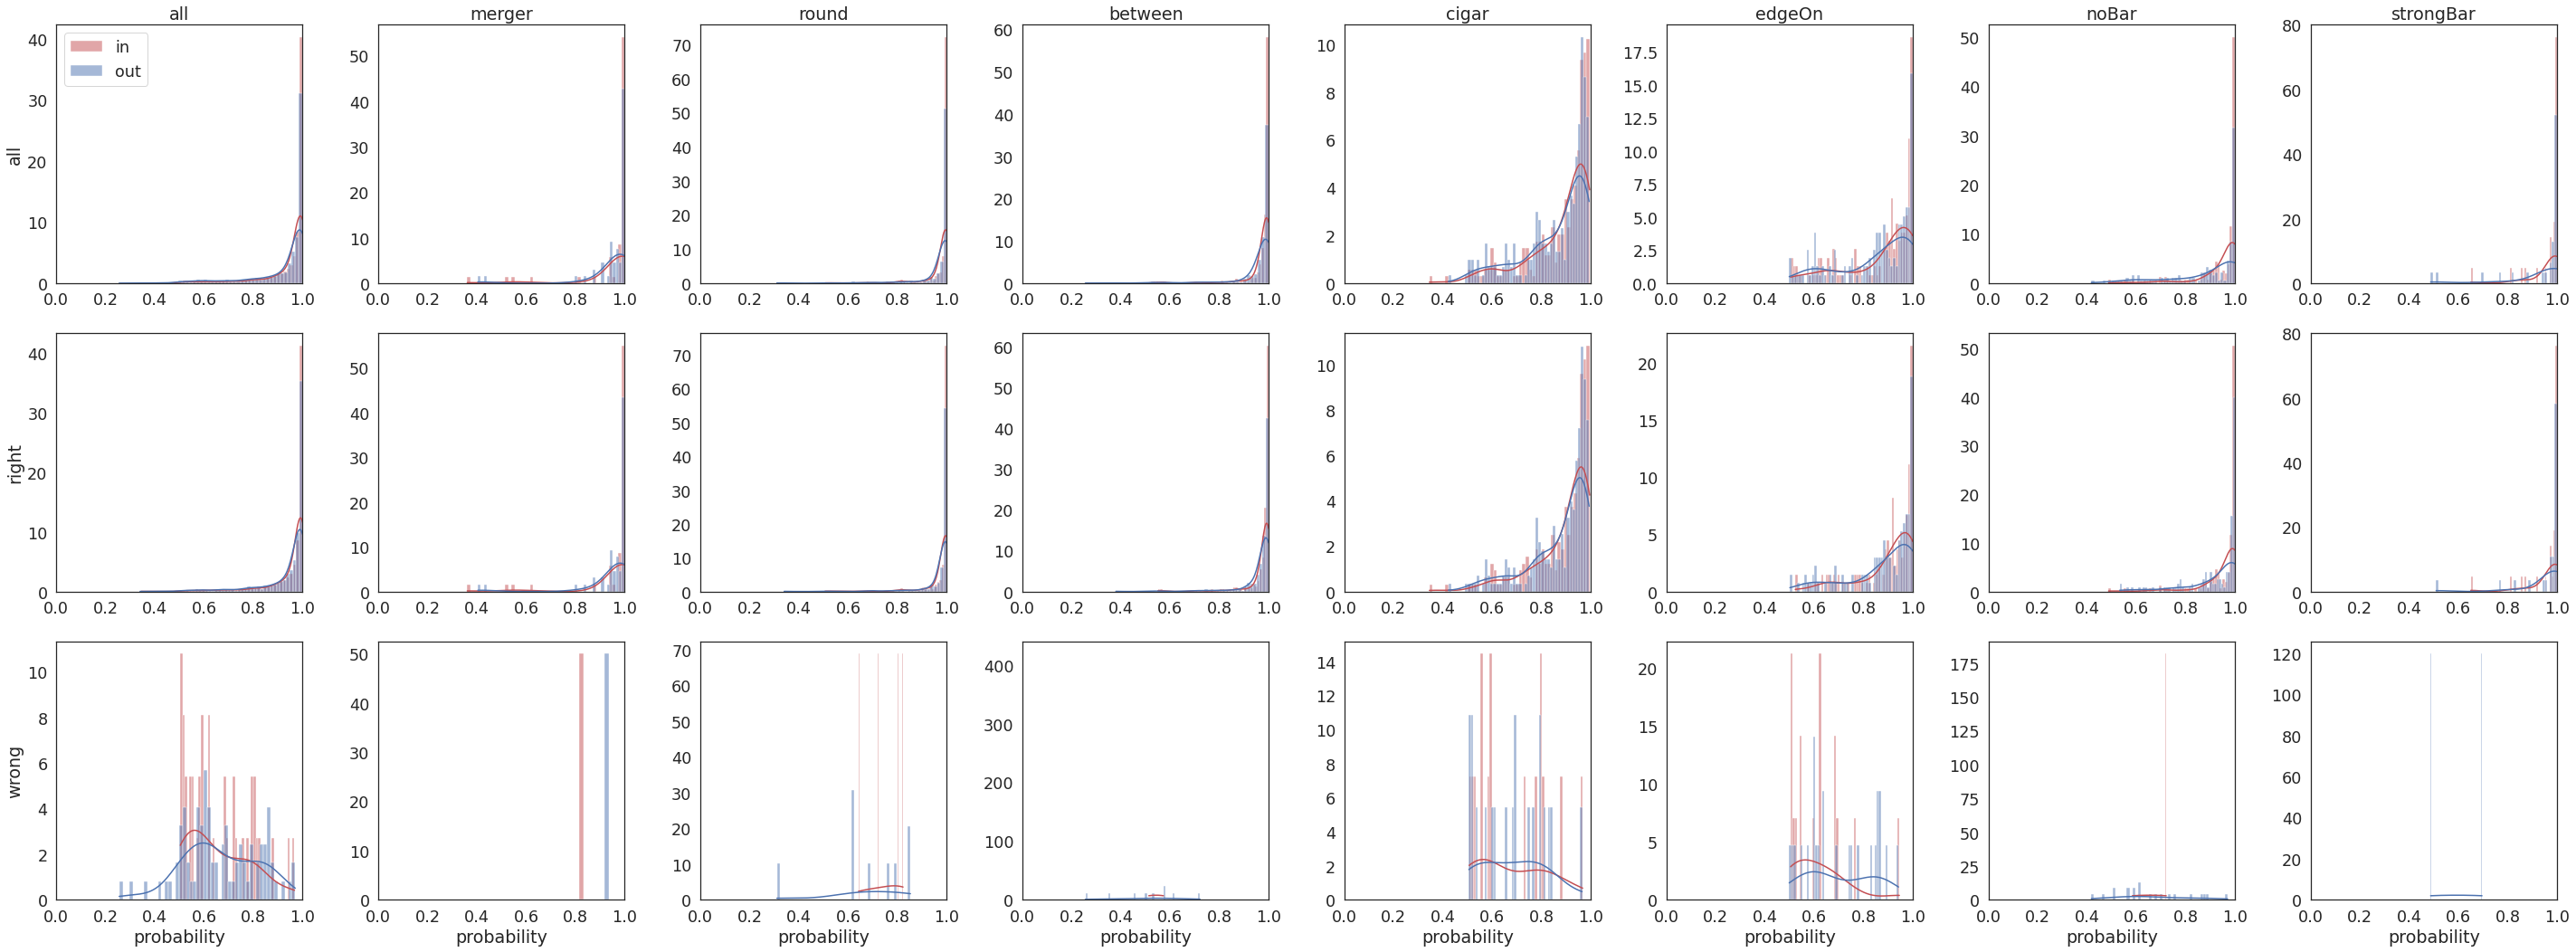

In [15]:
in_right = in_pred.query("label == pred")
out_right = out_pred.query("label == pred")
in_wrong = in_pred.query("label != pred")
out_wrong = out_pred.query("label != pred")
fig = plt.figure(figsize=(40, 15))
sns.set()
sns.set_theme(font='Times New Roman',font_scale=1.6, palette=None)
sns.set_style("white")
ax = fig.add_subplot(3, 8, 1)
ax.set_title("all")
sns.histplot(in_pred.prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_pred.prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel("all")
ax.legend(loc="upper left")
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 9)
sns.histplot(in_pred.query("label == pred").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_pred.query("label == pred").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel("right")
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 17)
sns.histplot(in_pred.query("label != pred").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_pred.query("label != pred").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel("probability")
ax.set_ylabel("wrong")
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 2)
ax.set_title("merger")
sns.histplot(in_pred.query("label == 0").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_pred.query("label == 0").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 10)
sns.histplot(in_right.query("label == 0").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_right.query("label == 0").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 18)
sns.histplot(in_wrong.query("label == 0").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_wrong.query("label == 0").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel("probability")
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 3)
ax.set_title("round")
sns.histplot(in_pred.query("label == 1").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_pred.query("label == 1").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 11)
sns.histplot(in_right.query("label == 1").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_right.query("label == 1").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 19)
sns.histplot(in_wrong.query("label == 1").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_wrong.query("label == 1").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel("probability")
ax.set_ylabel(None)
plt.xlim(0, 1)


ax = fig.add_subplot(3, 8, 4)
ax.set_title("between")
sns.histplot(in_pred.query("label == 2").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_pred.query("label == 2").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 12)
sns.histplot(in_right.query("label == 2").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_right.query("label == 2").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 20)
sns.histplot(in_wrong.query("label == 2").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_wrong.query("label == 2").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel("probability")
ax.set_ylabel(None)
plt.xlim(0, 1)


ax = fig.add_subplot(3, 8, 5)
ax.set_title("cigar")
sns.histplot(in_pred.query("label == 3").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_pred.query("label == 3").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 13)
sns.histplot(in_right.query("label == 3").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_right.query("label == 3").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 21)
sns.histplot(in_wrong.query("label == 3").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_wrong.query("label == 3").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel("probability")
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 6)
ax.set_title("edgeOn")
sns.histplot(in_pred.query("label == 4").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_pred.query("label == 4").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 14)
sns.histplot(in_right.query("label == 4").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_right.query("label == 4").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 22)
sns.histplot(in_wrong.query("label == 4").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_wrong.query("label == 4").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel("probability")
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 7)
ax.set_title("noBar")
sns.histplot(in_pred.query("label == 5").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_pred.query("label == 5").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 15)
sns.histplot(in_right.query("label == 5").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_right.query("label == 5").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 23)
sns.histplot(in_wrong.query("label == 5").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_wrong.query("label == 5").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel("probability")
ax.set_ylabel(None)
plt.xlim(0, 1)


ax = fig.add_subplot(3, 8, 8)
ax.set_title("strongBar")
sns.histplot(in_pred.query("label == 6").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_pred.query("label == 6").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 16)
sns.histplot(in_right.query("label == 6").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_right.query("label == 6").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.xlim(0, 1)

ax = fig.add_subplot(3, 8, 24)
sns.histplot(in_wrong.query("label == 6").prob,
             stat="density", label="in", bins=50, kde=True, color="r")
sns.histplot(out_wrong.query("label == 6").prob,
             stat="density", label="out", bins=50, kde=True)
ax.set_xlabel("probability")
ax.set_ylabel(None)
plt.xlim(0, 1)


plt.tight_layout()
plt.show()